In [1]:
# testing the other clalculator outputs
import sys
import os
import networkx as nx
import matplotlib.pyplot as plt

import traceback
sys.path.append(os.getcwd())
from Models.Graph_Classifier import GraphClassifier
from GEDLIB_Caclulator import GEDLIB_Calculator
from Dummy_Calculator import Dummy_Calculator
from Dataset import Dataset


In [2]:
def visualize_graph(graph: nx.Graph, node_labels_type: str = None, edge_labels_type: str = None):
    """
    Visualisiert einen NetworkX-Graphen mit optionalen Knoten- und Kantenbeschriftungen.
    """
    pos = nx.spring_layout(graph)
    if node_labels_type is not None:
        node_labels = nx.get_node_attributes(graph, node_labels_type)

    # Erstelle ein Dictionary für die Kantenbeschriftungen (Gewichte)
    if edge_labels_type is not None:
        edge_labels = nx.get_edge_attributes(graph, edge_labels_type)

    # Lege die Position der Knoten fest (hier zufällig, kann auch manuell erfolgen)
    pos = nx.spring_layout(graph)

    # Zeichne die Knoten
    nx.draw_networkx_nodes(graph, pos, node_color='lightblue', node_size=700)

    # Zeichne die Kanten
    nx.draw_networkx_edges(graph, pos)

    # Zeichne die Knotenbeschriftungen
    nx.draw_networkx_labels(graph, pos, labels=node_labels, font_size=12, font_color='black')

    # Zeichne die Kantenbeschriftungen
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, font_color='red')

    # Zeige den Plot an
    plt.title("Einfacher NetworkX-Graph")
    plt.axis('off')  # Achsen ausschalten
    plt.show()

In [3]:
def createNxGraph() :
    G = nx.Graph()
    G.add_node("C1", label = "C1", attr= "0.5")
    G.add_node("02", label = "02", attr= "0.5")
    # G.add_edge("C1", "02", label = "1", attr= "0.5")
    G.add_node("N3", label = "N3", attr= "0.5")
    G.add_node("C4", label = "C4", attr= "0.5")
    # G.add_edge("N3", "C4", label = "1", attr= "0.5")
    G.add_edge("C1", "C4", label = "a", attr= "0.5")
    G.add_edge("C4", "02", label = "a", attr= "0.5")
    G.add_edge("C4", "N3", label = "a", attr= "0.5")
    return G
def createNxGraph2() :
    G = nx.Graph()
    G.add_node("C1", label = "C1", attr= "0.5")
    G.add_node("O2", label = "O2", attr= "0.5")
    G.add_edge("C1", "O2", label = "b", attr= "0.5")
    G.add_node("N3", label = "N3", attr= "0.5")
    G.add_node("C4", label = "C4", attr= "0.5")
    G.add_edge("N3", "C4", label = "b", attr= "0.5")
    G.add_edge("N3", "O2", label = "b", attr= "0.5")
    return G

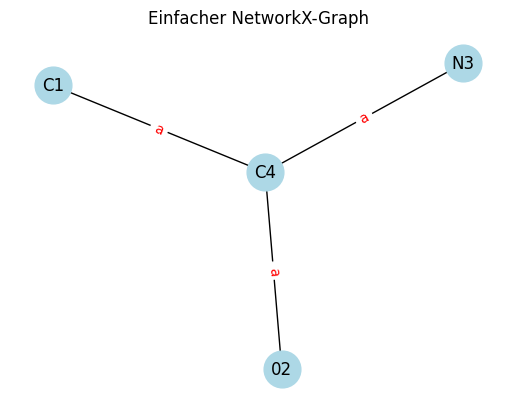

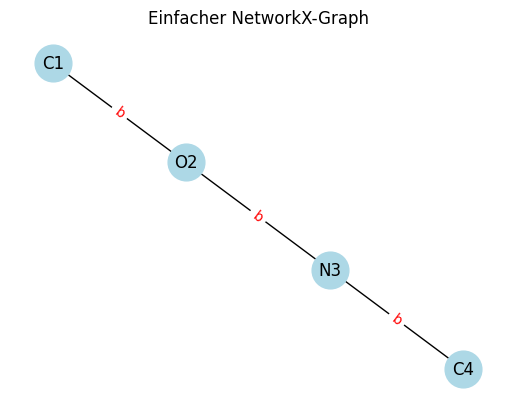

In [4]:
g1= createNxGraph()
visualize_graph(g1, node_labels_type="label", edge_labels_type="label")
g2 = createNxGraph2()
visualize_graph(g2, node_labels_type="label", edge_labels_type="label")

In [5]:

dataset= [g1, g2]
calculator = GEDLIB_Calculator(GED_calc_method="BRANCH", GED_edit_cost="CONSTANT")
calculator.add_graphs(dataset)
calculator.activate()
calculator.run_method(0, 1)
calculator.run_method(1, 0)




Initialized GEDLIB_Calculator with edit_cost=CONSTANT and method=BRANCH


Adding graphs to GEDLIB: 100%|██████████| 2/2 [00:00<00:00, 6264.83it/s]


In [6]:
display(calculator.get_lower_bound(0, 1))
display(calculator.get_upper_bound(0, 1))

5.0

6.0

In [7]:
display(calculator.get_forward_map(0,1))

[0, 1, 2, 3]

In [8]:
display(calculator.get_backward_map(0,1))

[0, 1, 2, 3]

In [9]:
display(calculator.get_all_map(0,1))

[[0, 1, 2, 3], [0, 1, 2, 3]]

In [10]:
display(calculator.get_node_map(0,1))

[(0, 0), (1, 1), (2, 2), (3, 3)]

In [11]:
display(calculator.get_assignment_matrix(0,1))

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0]]

In [12]:
display(calculator.get_node_image(0,1,0))
display(calculator.get_node_image(0,1,1))
display(calculator.get_node_image(0,1,2))
display(calculator.get_node_image(0,1,3))


0

1

2

3